In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load the data

df = pd.read_csv('../datasets/sanFran_clean.csv')
print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

# Subset the dataset

df = df[['district', 'day', 'time', 'month']]
df.head(3)

The dataset has 2160952 rows and 12 columns.


,district,day,time,month
0,NORTHERN,Tuesday,13:53:00,11
1,TARAVAL,Tuesday,23:10:00,3
2,TARAVAL,Thursday,12:00:00,5


In [3]:
df['hour'] = pd.to_datetime(df['time']).dt.hour # Extract hour 
del df['time'] # Delete Original Time column
df.head(2)

,district,day,month,hour
0,NORTHERN,Tuesday,11,13
1,TARAVAL,Tuesday,3,23


In [4]:
# Counting crime occurences for a particular district on a given timestap

df = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:'Crime Occurences'})
df["Crime Occurences"] = pd.to_numeric(df["Crime Occurences"]) # Convert to numeric values

print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))
df = df.sort_values(by = ['Crime Occurences'], ascending = False) # Sort by Crime Occurences
df.head(3)

The dataset has 20160 rows and 5 columns.


,district,day,month,hour,Crime Occurences
15858,SOUTHERN,Wednesday,1,18,391
15906,SOUTHERN,Wednesday,3,18,387
14298,SOUTHERN,Friday,8,18,383


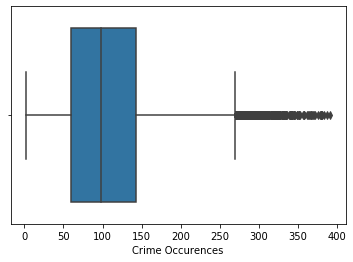

In [5]:
sns.boxplot(df['Crime Occurences'])

In [6]:
# Binning data into quartiles

bin_labels_5 = ['Low', 'Medium', 'High', 'Extreme'] # Defining Quartile Labels
df['Class'] = pd.qcut(df['Crime Occurences'], q=4, labels=bin_labels_5)

print(df.Class.value_counts())
df.sample(n=3) # Print five random rows for inspection

Medium     5074
Low        5053
High       5023
Extreme    5010
Name: Class, dtype: int64


,district,day,month,hour,Crime Occurences,Class
1676,BAYVIEW,Tuesday,10,20,123,High
17228,TARAVAL,Sunday,10,20,88,Medium
16213,TARAVAL,Friday,4,13,103,High


In [7]:
# Saving dataset

df.to_csv('../datasets/classificationData.csv')